# Model Evaluation and Refinement

In this lab, I'll try to refine our model's performance in predicting the price of a labtop.

## Objectives

   - Use training, testing and cross validation to improve the performance of the dataset.
   - Identify the point of overfitting of a model
   - Use Ridge Regression to identify the change in performance of a model based on its hyperparameters
   - Use Grid Search to identify the best performing model using different hyperparameters
   
 

In [3]:
# Importing Required libraries

from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [5]:
df = pd.read_csv(r"C:\Users\Aayush\Documents\Python Learning\pandas-project\Data Analysis with python\Task 6 Model Evaluation laptop pricing\laptop_pricing_dataset_mod2.csv",header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [6]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1, inplace=True)

In [7]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [9]:
df.shape

(238, 14)

# Using Cross Validation to improve the model



In [10]:
y_data = df['Price']

x_data = df.drop('Price',axis=1)

Spliting the data set into training and testing subsets such that we reserve 10% fo the data set for testing purpose

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state = 1)

print('Number of test sample: ',x_test.shape[0])
print('Number of train sample: ',x_train.shape[0])

Number of test sample:  24
Number of train sample:  214


Creating the single variable linear regression model using 'CPU_frequency' parameter. Print the R^2 value of this model for the training and testing subsets.

In [12]:
lm = LinearRegression()

lm.fit(x_train[['CPU_frequency']],y_train)

print(lm.score(x_test[['CPU_frequency']],y_test))
print(lm.score(x_train[['CPU_frequency']],y_train))

-0.06599437350393766
0.14829792099817973


Running 4-fold cross validation on the model and print mean value of R^2 score along with its standard deviation

In [13]:
Rcross = cross_val_score(lm, x_data[['CPU_frequency']],y_data,cv = 4)

print('Mean of the fold are: ',Rcross.mean()," and the standard deviation is ",Rcross.std())

Mean of the fold are:  -0.16109232388595118  and the standard deviation is  0.3849579786664711


# Overfitting

Split the data set into training and testing component again, this time reserving 50% of the data set for testing

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state = 0)

print('Number of test sample: ',x_test.shape[0])
print('Number of train sample: ',x_train.shape[0])

Number of test sample:  119
Number of train sample:  119


To identify the point of overfitting the model on the parameter 'CPU_frequency', we'll need to create polynomial features using the single attribute. We need to evaluate the R^2 scores of the model created using differrent degrees of polynomial features, ranging from 1 to 5. 

In [17]:
lm = LinearRegression()
Rsqu_test = []
order = [1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
    lm.fit(x_train_pr, y_train)
    Rsqu_test.append(lm.score(x_test_pr, y_test))

Text(0.5, 1.0, 'R^2 using Test Data')

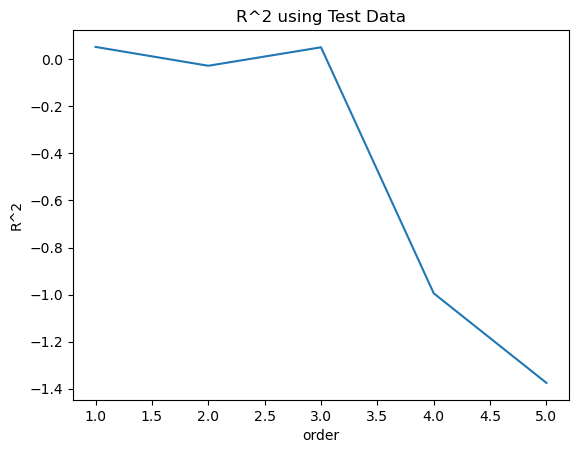

In [18]:
# Plotting the value of R^2 score aginst the order.

plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 using Test Data')

# Ridge Regression

Now considering the we have multiple features i.e. 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create  polynomial feature mdoel that uses all these parameters with degree=2. Also create the training and testing attribute sets.

In [20]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr = pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

Creating a Ridge Regression model and evaluate it using values of parameter alpha raning from 0.001 to 1 with increments of 0.001. Create a list of all Ridge Regression R^2 scores for training and testing data


In [22]:
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████████████████████████████████████| 999/999 [00:07<00:00, 133.91it/s, Test Score=0.423, Train Score=0.669]


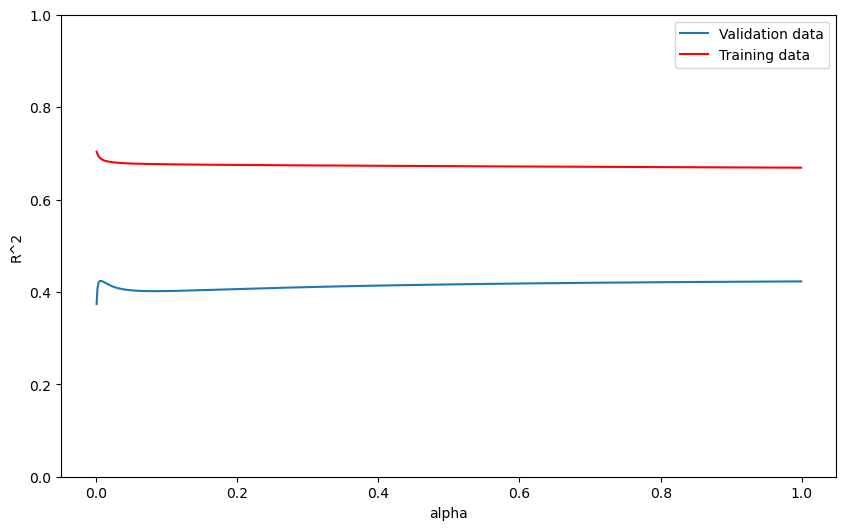

In [24]:
# Plot the R^2 vlaues for training and testing sets w.r. to alpha

plt.figure(figsize=(10,6))
plt.plot(Alpha, Rsqu_test, label = 'Validation data')
plt.plot(Alpha, Rsqu_train, 'r',label = 'Training data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0,1)
plt.legend()

# Grid Search

Using the raw data and the same set of features as used above, use GridSearchCV to idenfy the value of alpha for which model performs best. Assume the set of alpha values to be used as
```math
{0.0001, 0.001, 0.01, 0.1, 1, 10}
```


In [25]:
parameters1 = [{'alpha':[0.0001,0.001,0.01,0.1,1,10]}]

In [26]:
# Create a Ridge instance and run Grid Search using 4 fold cross validation

RR = Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [27]:
# fit the grid search to training data
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [28]:
BestRR = Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_test))

0.3009905048691818
